# Exemple d'arbre de décision pour la régression
Dans cet exemple, nous entrainerons un arbre de décision sur un jeu de donnée avec une seule variable.<br>
Les résultats analysés sont affichés pour différentes valeurs d'hperparamètres.

In [8]:
# scikit-learn, matplotlib et numpy
from sklearn import tree,ensemble,datasets
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
# Génération du jeu d'entrainement
N = 100
X = np.arange(1,N+1)
Y = np.log(X)
Y += 0.5*np.random.normal(size=N)

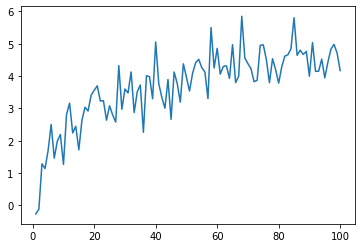

In [10]:
# Affichage des données
plt.plot(X,Y)

In [11]:
# modification de la forme de X
X=np.reshape(X,(-1,1))

In [12]:
# Instanciation d'un arbre de décision avec un nombre d'exemple par feuille supérieur ou égal à 3
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(min_samples_leaf=3)

In [13]:
#Entrainement du modèle
DTR.fit(X,Y)

DecisionTreeRegressor(min_samples_leaf=3)

**Installation Graphiz pour affichage:** graphviz est une librairie qui propose une classe permetant d'afficher un arbre de décision. Cette librairie nécessite une installation particulière :<br>
0. Fermer Jupyter et le navigateur Anaconda
1. Ouvrir une fenêtre de commande Anaconda Promtp sous windows ou une fenêtre de commande simple sous linux
2. Executer la commande : conda install graphviz (sous windows) ou : pip install graphviz (sous linux)
3. Relancer Jupyter

Si cette première procèdure ne fonctionne pas, essayez celle-ci (procédure windows):
0. Fermer Jupyter et le navigateur Anaconda
1. Ouvrir une fenêtre de commande Anaconda Promtp
2. Executer la commande : conda install graphviz
3. Télécharger Graphviz (https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/)
4. Ajouter la variable d'environnement  GRAPHIZ (variables utilisateur) avec le chemin:C:\Program Files (x86)\Graphviz2.38\bin
5. Relancer Jupyter

Si cela ne fonctionne toutjours pas, ingnorez les deux prochaines cellules.

In [14]:
import graphviz 
def graph_viz(DTR):
    Tree_graph = tree.export_graphviz(DTR, out_file=None, 
    feature_names="X",  
    class_names="Y",  
    filled=True, rounded=True,  
    special_characters=True) 
    graph = graphviz.Source(Tree_graph)
    return(graph)

In [15]:
graph_viz(DTR)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [16]:
# nombre de fueilles
DTR.get_n_leaves()

28

In [17]:
# profondeur de l'arbre
DTR.get_depth()

10

In [18]:
# Performance RMSE
from sklearn.metrics import mean_squared_error
Y_hat=DTR.predict(X)
MSE=mean_squared_error(Y_hat,Y)
RMSE=MSE**(1/2)
print("RMSE: ",RMSE)

RMSE:  0.40724715556502716


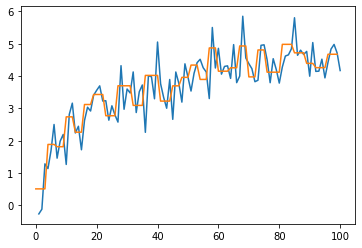

In [19]:
# Affichage courbe
plt.plot(X,Y,Y_hat)

**Que se passe-t-il lorsque l'effectif minimum par feuille est fixé à 10 ?**

In [20]:
DTR=DecisionTreeRegressor()

In [21]:
DTR.fit(X,Y)

DecisionTreeRegressor()

In [22]:
Y_hat=DTR.predict(X)
MSE=mean_squared_error(Y_hat,Y)
RMSE=MSE**(1/2)
print("RMSE: ",RMSE)

RMSE:  0.0


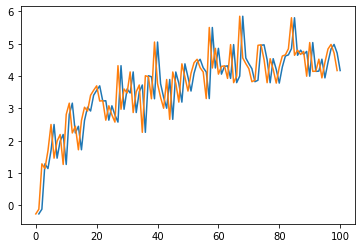

In [23]:
plt.plot(X,Y,Y_hat)

# Un exemple plus complet à partir de donnée importées
Dans cet exemple, certaines parties sont à compléter en se référant à la documentation officielle : https://scikit-learn.org/stable/modules/tree.html#tree <br>
Dans cet exemple, l'objectif est de prédire la valeur moyenne des maisons dans les districts californiens en utilisant un arbre de décision.<br>
Pour atteindre cet objectif, nous suivrons un processus standard qui se décline en 8 grandes étapes :<br>
- Importation et préparation des données avec Pandas
- Création d'un jeu de donnée d'entrainement et de test
- Création d'un pipeline de transformation applicable aux données d'entrainement et de test
- Instanciation et paramètrage d'un modèle de prédiction
- Entrainement du modèle à partir du jeu d'entrainement
- Validation du modèle à partir du jeu d'entrainement
- Performance du modèle mesurée sur jeu de test
- Prediction sur de nouvelle données

Les deux dernières étapes ne sont envisagées que lorsque le modèle a été validé. Une mauvaise performance sur le jeu de test pour nous conduire à changer les valeurs d'hyperparamètres ou a choisir un autre modèle plus ou moins complexe. Ces ajustements trahissent une forme d'apprentissage sur les données de test que nous ne sommes pas censés connaître.

## Importation et préparation des données avec Python

In [24]:
import pandas as pd
import numpy as np
data_dir="Dataset/" # chemin relatif vers le fichier de données. A adapter selon l'emplacement choisi pour le fichier de données.
data=pd.read_csv(data_dir+"California_Housing - Copie.csv",delimiter=";")

In [25]:
# Nettoyage des données
data_cleaned=data.loc[data.population<=5*data.population.std()] # suppression des données aberrantes
data_cleaned=data_cleaned.drop("total_pools",axis=1) # suppression de la colonne "total_pools" constituée à 50% de valeurs nulles
data_cleaned=data_cleaned.drop(["longitude","latitude"],axis=1) # suppression des colonnes longitude et latitude
data_cleaned=data_cleaned.dropna(axis=0) # supression des lignes contenant au moins une valeur nulle
data_cleaned=data_cleaned.astype({'total_rooms': 'float64','ocean_proximity':'category'}) # conversion de type

In [26]:
data_cleaned

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Création d'un jeu de donnée d'entrainement et de test

In [33]:
# Utilisez la fonction train_test_split pour créer un jeu de donnée d'entrainement et de test à partir du dataframe data_cleaned
# Faites cette répartition en mettant de côté 20% des données pour la phase de test
# utilisez random_state=42 pour reproduire la même répartition à chaque execution
from sklearn.model_selection import train_test_split
Train_set, Test_set= train_test_split(data_cleaned, test_size=0.2, random_state=42)

In [31]:
# Il faut maintenant séparer les features des labels
# Utilisez les liste features et label pour faire cette séparation
features=["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"]
label=["median_house_value"]

In [34]:
# Complétez le code ci-dessous
Train_set_features= Train_set[features]
Test_set_features= Test_set[features]
Train_set_label= Train_set[label]
Test_set_label= Test_set[label]

## Création d'un pipeline de transformation applicable aux données d'entrainement et de test
Avant de prodécder à l'apprentissage, il est souvent nécessaire de transformer certaines features pour les rendre compatibles avec les logiques propres à chaque algorithme et le type de tâche à réaliser (régression ou classification).<br>

Quelque soit le modèle d'apprentissage utilisé et la tâche à réaliser, il est nécessaire de fournir aux algorithmes des données d'entrée numériques. Dans notre cas, la variable "ocean_proximity" doit être transformée en valeurs numérique via le transformateur OrdinalEncoder (documentation : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) <br>

**Remarque:** Les transformations OneHotEncoder et StandardScaler ne sont pas nécessaires dans le cas des arbres de décision

In [35]:
# importation des classes utiles à la transformation et à la création d'un pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [36]:
# Pour appliquer des tranformations sur des groupes de colonnes on peut construire un pipeline de transformations avec un objet ColumnTransformer
# Nous commençons par distinguer les variables selon leur type (categorielles ou continues)
cat_attribs=["ocean_proximity"]
num_attribs=["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]

In [37]:
# ColumnTransformer prend comme attribut un liste de tuple chacun correspondant à une transformation particulière
# L'ordre des variables en sortie de la transformation correspond à l'ordre des transformations.
# Un tuple représentant une transformation prend la for ("nom_transformation",transformateur(),liste_colonne)
# Complétez le code ci-dessous
pipeline=ColumnTransformer([
    ("other", "passthrough", num_attribs),
    ("Ord_encoder", OrdinalEncoder(), cat_attribs)
])

**Remarque:** En sortie du pipeline, l'ordre des features correspond à l'ordre des transformations.

In [ ]:
# Pour appliquer le pipeline, il suffit d'invoquer la méthode fit_transform
# Complétez le code ci-dessous
Train_set_features_transformed= pipeline.fit_transform()
Test_set_features_transformed= pipeline.fit_transform()

## Instanciation et paramètrage d'un arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Créez un arbre de décision pour la régression avec les paramètres standards
# Complétez le code ci-dessous
DTR=

**Question:** Quelles sont la classes qui permettent de créer des modèles linéaires résularisés ?<br>
**Remarque:** Le modèle peut être inégré en dernière étape du pipeline

## Entrainement du modèle à partir du jeu d'entrainement
L'ntrainement du modèle peut se faire simplement via la méthode fit.

In [ ]:
# Entrainez l'arbre de décision en utilisant la métohe fit


In [ ]:
# Affichez la RMSE mesurée sur le jeu d'entrainement


print("RMSE: ",RMSE)

**Questions:**
- Que signifie la valeur de RMSE obtenue ?
- Qu'est ce qui explique cette valeur ?
- Comment éviter ce phénomène ?

In [ ]:
# Réalisez un apprentissage en utilisant une recherche d'hyperparamètres par GridSearch
# Consultez la documentation pour comprenre le principe de cette méthode : https://scikit-learn.org/stable/modules/grid_search.html#grid-search
# Compéltez le code ci-dessous pour évaluer la perforamnce de modèles combinant au moins deux veleurs de trois hyperparamètres propres aux arbres de décision 
# (Ex : max_depth, min_samples_leaf, min_samples_split)

# complétez le code ci-dessous
param_grid=[{}]

In [ ]:
# Création d'un objet GridSearch avec cross-validation 
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(DTR,param_grid,cv=3,scoring='neg_mean_squared_error',return_train_score=True)

In [ ]:
# Entrainement des modèles issus de la cominaison des hyperparamètres 
grid_search.fit(Train_set_features_transformed,Train_set_label)

In [ ]:
# Affichage des modèles entrainés
grid_search.cv_results_['params']

In [ ]:
# Affichage de la MSE de chaque modèle sur le jeu d'entrainement
grid_search.cv_results_['mean_test_score']

In [ ]:
# Affichage de la MSE de chaque modèle sur le jeu de validation
grid_search.cv_results_['mean_train_score']

In [ ]:
# Comparaison de la MSE d'entrainement et de validation pour chaque modèle
ind = np.arange(len(grid_search.cv_results_['mean_train_score'])) 
width = 0.35
fig, ax = plt.subplots(figsize=(18,12))
rects1 = ax.bar(ind - width/2, -grid_search.cv_results_['mean_train_score'], width,
                color='SkyBlue', label='Train')
rects2 = ax.bar(ind + width/2, -grid_search.cv_results_['mean_test_score'], width, 
                color='IndianRed', label='Test')

ax.set_ylabel('Loss')
ax.set_title('Loss per scenario')
ax.set_xticks(ind)
ax.legend()

In [ ]:
# Affichage de l'indexe du meilleur modèle sur la base de la MSE en validation
grid_search.best_index_

In [ ]:
# Affichez les valeurs d'hyperparamètre du meilleur modèle


In [ ]:
# Calculez la RMSE du meilleur modèle mesurée sur le jeu d'entrainement et sur le jeu de validation


In [ ]:
# Choix du meilleur modèle 
Best_Model_DTR=grid_search.best_estimator_

In [ ]:
# Utilisez l'attribut feature_importances_ pour afficher l'importance relative des variables
# Référez-vous à la documentation pour interpréter ces résultats : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_
# Complétez le code ci-dessous
Feat_imp=

In [ ]:
# Affichage de l'importance relative des variables avec nom de la colonne
Feat_imp=dict(zip(Train_set_features.columns,Feat_imp))
dict(sorted(Feat_imp.items(), key=lambda item: item[1],reverse=True))

In [ ]:
# Visualisation de l'arbre
def graph_viz(DTR,features,label):
    Tree_graph = tree.export_graphviz(DTR, out_file=None, 
    feature_names=features,  
    class_names=label,  
    filled=True, rounded=True,  
    special_characters=True) 
    graph = graphviz.Source(Tree_graph)
    return(graph)
graph_viz(Best_Model_DTR,Train_set_features.columns,"ocean_proximity")

## Validation du modèle à partir du jeu d'entrainement
Pour mesurer la qualité d'un prédicteur et la capcité de généralisation d'un modèle, il est recommandé d'utiliser une partie du jeu d'entrainement pour calculer les paramètres du modèle et une autre partie pour en mesurer la performance.
En cas de sur ou sous apprentissage, on peut ainsi recalibrer les hyper-paramètres du modèle sans avoir à utiliser le jeu de test.
Pour maximiser l'utilisation des données d'apprentissage pour le calcul des paramètres, une bonne pratique consiste à réaliser une cross-validation par la méthode des K-folds.<br>
Consultez la documentation pour comprendre le principe de cette méthode : https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
# Fonction d'affichage graphique

import matplotlib.pyplot as plt

def Train_validation_curves(train_sizes,train_scores,valid_scores,secondary=True):
    t = train_sizes
    fig, ax1 = plt.subplots()

    color='tab:red'
    ax1.set_xlabel('Training Sample Size')
    ax1.set_ylabel('RMSE')
    ax1.plot(t, np.mean(np.sqrt(-train_scores),axis=1), color=color,label='Train')

    if secondary:
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_ylabel('RMSE Train',color=color)
        color='tab:blue'
        ax2 = ax1.twinx()
        ax2.set_ylabel('RMSE Validation',color=color)
        ax2.plot(t, np.mean(np.sqrt(-valid_scores),axis=1),color=color ,label='Validation')
        ax2.tick_params(axis='y', labelcolor=color)
    else:
        color='tab:blue'
        ax1.plot(t, np.mean(np.sqrt(-valid_scores),axis=1),color=color ,label='Validation')
        ax1.legend()
      

    plt.show()

### Validation du modèle DTR issu d'un apprentissage simple

In [ ]:
# Représentation sur un graphe 
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(DTR, Train_set_features_transformed, np.array(Train_set_label).reshape(-1,),train_sizes=list(range(100,9700,100)), cv=3,scoring='neg_mean_squared_error')
Train_validation_curves(train_sizes,train_scores,valid_scores,False)

**Question:** Analysez rapidement la forme des courbes de RMSE en entrainement et en validation

### Validation du modèle Best_Model_DTR issu d'une recherche d'hyperparamètre par GridSearch

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(Best_Model_DTR, Train_set_features_transformed, np.array(Train_set_label).reshape(-1,),train_sizes=list(range(100,9700,100)), cv=3,scoring='neg_mean_squared_error')
Train_validation_curves(train_sizes,train_scores,valid_scores,False)

**Question:** Analysez rapidement la forme des courbes de RMSE en entrainement et en validation

# Random Forest
En reprenant les étapes précédentes :
- Créez un modèle de régression de type RandomForestRegressor
- Entrainez plusieurs modèles en utilisant un GridSearch (utilisez deux valeurs différentes pour les paramètres min_samples_leaf et n_estimators)
- Affichez graphiquement les performances en entrainement et en validation des différents modèles
- Identifiez le meilleur modèle "Best_Model_RFR" sur la base de la MSE en validation
- Affichez pour le meilleur modèle, la RMSE en entrainement et la RMSE en validation
- Affichez l'importance relative des variables

# Performances sur jeu de test
Utilisez le jeu de test pour mesurer la performace des modèles : Best_Model_DTR et Best_Model_RFR

# Retour vers Stage 0 ou Stage 1
Si vous avez fini, prenez le temps de donner un coup de main à vos camarades encore en Stage 0 ou Stage 1